| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./03_Matematica_aplicada_al_aprendizaje_automático_algebra_lineal.ipynb)| [⏩](./05_Matematica_aplicada_al_aprendizaje_automático_algebra_lineal.ipynb)|

# **04 Matemática aplicada al aprendizaje automático: álgebra lineal**

## **4.1 Las matrices realizan mapeados lineales**

En el módulo 4, continuamos nuestra discusión sobre las matrices; primero pensamos en cómo codificar la multiplicación de matrices y las operaciones matriciales utilizando la Convención de Suma de Einstein, que es una notación muy utilizada en los cursos de álgebra lineal más avanzados. Después, veremos cómo las matrices pueden transformar la descripción de un vector de una base (conjunto de ejes) a otra. Esto nos permitirá, por ejemplo, averiguar cómo aplicar una reflexión a una imagen y manipular imágenes. También veremos cómo construir un conjunto de vectores de base conveniente para realizar dichas transformaciones. A continuación, escribiremos algo de código para realizar estas transformaciones y aplicaremos este trabajo computacionalmente.

### **4.1.1 La convención de suma de Einstein y la simetría del producto punto**

La **convención de suma de Einstein** y la **simetría del producto punto** son dos conceptos fundamentales en matemáticas y física que simplifican la notación y resaltan propiedades importantes de las operaciones vectoriales y tensoriales. Vamos a explorar cada concepto detalladamente, proporcionando ejemplos, visualizaciones gráficas y código Python para ilustrar su uso y significado.

**Convención de Suma de Einstein**

La convención de suma de Einstein, introducida por Albert Einstein, es una notación simplificada que elimina el símbolo de suma en las expresiones matemáticas donde se realiza una suma sobre índices que aparecen repetidos en un término. Es ampliamente utilizada en física y matemáticas, especialmente en teoría de la relatividad y mecánica de medios continuos.

**Definición y Ejemplo**

Cuando un índice aparece dos veces en un solo término y no está afectado por un operador de suma explícito, se entiende que se suma sobre ese índice. Por ejemplo, en lugar de escribir:

$a_i b_i = \sum_{i=1}^n a_i b_i$

usando la convención de suma de Einstein, simplemente escribimos:

$a_i b_i$

donde se asume la suma sobre el índice $(i)$ desde 1 hasta $(n)$.

**Simetría del Producto Punto**

El producto punto (o producto escalar) es una operación fundamental entre dos vectores que resulta en un escalar. La simetría del producto punto se refiere a su propiedad conmutativa:

$\mathbf{a} \cdot \mathbf{b} = \mathbf{b} \cdot \mathbf{a}$

Esto significa que el orden de los vectores en el producto punto no afecta el resultado.

**Ejemplo Matemático**

Dados dos vectores en $(\mathbb{R}^3)$, $\mathbf{a} = (a_1, a_2, a_3)$ y $\mathbf{b} = (b_1, b_2, b_3)$, su producto punto es:

$\mathbf{a} \cdot \mathbf{b} = a_1 b_1 + a_2 b_2 + a_3 b_3$

Utilizando la convención de suma de Einstein, escribimos:

$\mathbf{a} \cdot \mathbf{b} = a_i b_i$

**Ejemplo en Python: Uso de la Convención de Suma de Einstein**

Aunque Python no implementa directamente la convención de suma de Einstein, podemos usar la función `einsum` de NumPy para aplicar un concepto similar.

**Código Python para Producto Punto**

In [1]:
import numpy as np

# Definir dos vectores en R^3
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Producto punto usando np.dot
dot_product = np.dot(a, b)

# Producto punto usando convención de suma de Einstein
einsum_dot_product = np.einsum('i,i', a, b)

print("Producto punto usando np.dot:", dot_product)
print("Producto punto usando np.einsum:", einsum_dot_product)

Producto punto usando np.dot: 32
Producto punto usando np.einsum: 32


**Visualización**

Vamos a visualizar los vectores y su producto punto en un gráfico.

**Código para Visualización en Python**

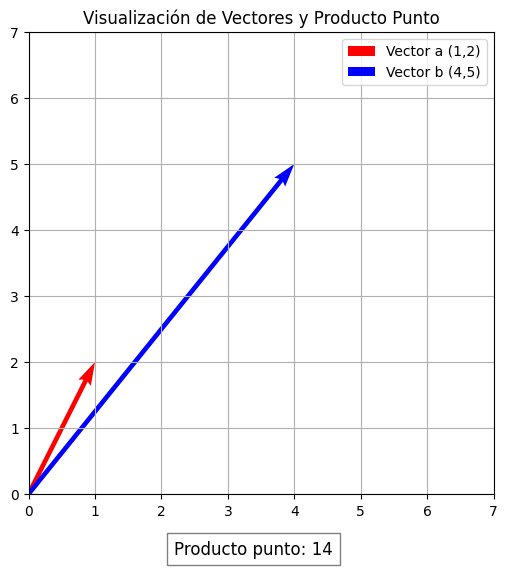

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(v, origin, color, label):
    # Aseguramos que sólo estamos ploteando 2D
    if len(v) > 2:
        v = v[:2]  # Tomamos sólo las dos primeras componentes para la visualización
    plt.quiver(origin[0], origin[1], v[0], v[1], angles='xy', scale_units='xy', scale=1,
               color=color, label=label, width=0.01)

# Definir vectores (en 2D para simplificación, ajusta según necesites)
a = np.array([1, 2])
b = np.array([4, 5])

# Crear la figura
plt.figure(figsize=(6, 6))
plot_vector(a, [0, 0], 'red', 'Vector a (1,2)')
plot_vector(b, [0, 0], 'blue', 'Vector b (4,5)')

# Configuraciones del gráfico
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title('Visualización de Vectores y Producto Punto')

# Calcular y mostrar el producto punto si es relevante
producto_punto = np.dot(a, b)
plt.figtext(0.5, 0.01, f'Producto punto: {producto_punto}', ha='center', fontsize=12, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

# Mostrar el gráfico
plt.show()

**Conclusión**

La convención de suma de Einstein simplifica enormemente la escritura y cálculo de expresiones en áreas de física y matemáticas donde los productos tensoriales son comunes. La simetría del producto punto, por su parte, es una propiedad fundamental que es utilizada para demostrar diversas leyes físicas y propiedades geométricas. Estos conceptos no solo facilitan los cálculos, sino que también proporcionan una mayor intuición sobre la estructura subyacente de las teorías físicas y matemáticas.

### **4.1.2 Matrices que cambian de base**

Las matrices que cambian de base son fundamentales en álgebra lineal y tienen aplicaciones cruciales en diversas áreas de las matemáticas y la ingeniería. Estas matrices facilitan la transición entre diferentes sistemas de coordenadas y son especialmente útiles en la simplificación de problemas, optimización de cálculos y teorización en muchas disciplinas técnicas.

**Concepto de Cambio de Base**

El **cambio de base** en un espacio vectorial involucra la transformación de las coordenadas de vectores de una base a otra. Una base de un espacio vectorial es un conjunto de vectores linealmente independientes que pueden generar cualquier vector en ese espacio a través de combinaciones lineales.

**Bases y Coordenadas**

Supongamos que tenemos dos bases para el mismo espacio vectorial $(\mathbb{R}^n)$:

- Base $(\mathcal{B} = {\mathbf{b}_1, \mathbf{b}_2, \ldots, \mathbf{b}_n})$

- Base $(\mathcal{C} = {\mathbf{c}_1, \mathbf{c}_2, \ldots, \mathbf{c}_n})$

Un vector $(\mathbf{v})$ en este espacio puede ser expresado en términos de ambas bases:

- En base $(\mathcal{B}): (\mathbf{v} = v_1\mathbf{b}_1 + v_2\mathbf{b}_2 + \ldots + v_n\mathbf{b}_n)$

- En base $(\mathcal{C}): (\mathbf{v} = w_1\mathbf{c}_1 + w_2\mathbf{c}_2 + \ldots + w_n\mathbf{c}_n)$

**Matriz de Cambio de Base**

La **matriz de cambio de base** permite convertir las coordenadas de un vector desde una base a otra. Si $(P_{\mathcal{B} \rightarrow \mathcal{C}})$ es la matriz que cambia de la base $(\mathcal{B})$ a la base $(\mathcal{C})$, entonces transforma las coordenadas de $(\mathbf{v})$ en $(\mathcal{B})$ a sus coordenadas en $(\mathcal{C})$:

$[ \mathbf{v} ]_{\mathcal{C}} = P_{\mathcal{B} \rightarrow \mathcal{C}} [ \mathbf{v} ]_{\mathcal{B}}$

**Construcción de la Matriz de Cambio de Base**

Para construir $(P_{\mathcal{B} \rightarrow \mathcal{C}})$, cada columna de $(P)$ debe ser las coordenadas del correspondiente vector de $(\mathcal{B})$ expresadas en la base $(\mathcal{C})$.

**Ejemplo: Cambio de Base en $(\mathbb{R}^2)$**

Supongamos que queremos cambiar de la base estándar $\mathcal{E} = \{\mathbf{e}_1, \mathbf{e}_2\}$ a una nueva base $\mathcal{B} = \{\mathbf{b}_1, \mathbf{b}_2\}$, donde $\mathbf{b}_1 = (1, 1)$ y $\mathbf{b}_2 = (1, -1)$.

**Paso 1: Expresar Vectores de $(\mathcal{B})$ en $(\mathcal{E})$**

Aquí, $(\mathbf{b}_1)$ y $(\mathbf{b}_2)$ ya están dados en coordenadas de $(\mathcal{E})$.

**Paso 2: Formar la Matriz de Cambio de Base**

$P_{\mathcal{E} \rightarrow \mathcal{B}} = \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}$

Esta matriz es invertible, lo que indica que la base $(\mathcal{B})$ es válida.

**Código en Python para Cambio de Base**

In [3]:
import numpy as np

# Matriz de cambio de base de E a B
P = np.array([[1, 1], [1, -1]])

# Vector en la base E
v_E = np.array([2, 3])  # Coordenadas en base estándar

# Cambiar de E a B
v_B = np.linalg.inv(P).dot(v_E)  # Aplicar P^(-1)

print("Coordenadas del vector en base B:", v_B)

Coordenadas del vector en base B: [ 2.5 -0.5]


**Visualización del Cambio de Base**

Podemos visualizar este cambio usando matplotlib para entender mejor cómo se transforma el espacio.

**Código para Visualización en Python**

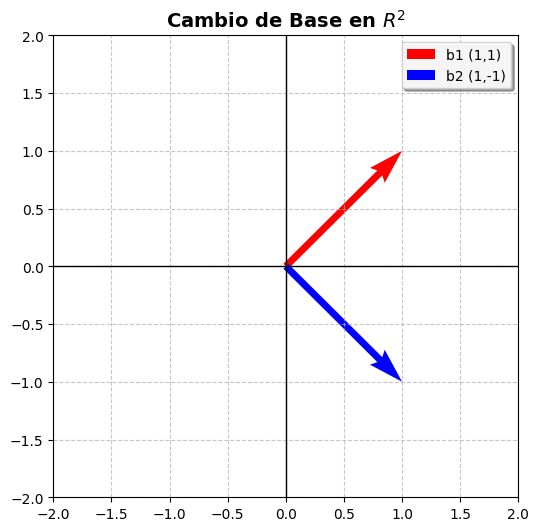

In [4]:
import matplotlib.pyplot as plt

def plot_vector(vec, origin, color, label):
    # Ajustar la escala y el estilo de la flecha para una visualización más clara
    plt.quiver(origin[0], origin[1], vec[0], vec[1], scale=1, scale_units='xy', angles='xy', 
               color=color, label=label, width=0.015, headwidth=3, headlength=5)

# Configurar el gráfico
plt.figure(figsize=(6, 6))
plot_vector([1, 1], [0, 0], 'red', 'b1 (1,1)')  # Base vector 1
plot_vector([1, -1], [0, 0], 'blue', 'b2 (1,-1)')  # Base vector 2

# Ajustes de visualización
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True, linestyle='--', alpha=0.7)  # Grilla mejorada para visibilidad
plt.axhline(0, color='black', linewidth=1)  # Líneas de los ejes más visibles
plt.axvline(0, color='black', linewidth=1)
plt.legend(loc='upper right', fontsize=10, frameon=True, framealpha=0.9, shadow=True)  # Leyenda mejorada
plt.title('Cambio de Base en $R^2$', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

**Conclusión**

Las matrices que cambian de base son esenciales para entender y manipular diferentes representaciones de vectores y transformaciones en distintos sistemas de coordenadas. Su comprensión y aplicación permiten simplificar problemas, optimizar algoritmos y proporcionar nuevas perspectivas en la investigación científica y tecnológica.

### **4.1.3 Hacer una transformación en una base modificada**

Realizar una transformación en una base modificada es un concepto clave en álgebra lineal, especialmente útil en gráficos por computadora, teoría de control y física. Este proceso implica cambiar el sistema de coordenadas de un espacio vectorial a una base más conveniente, realizar una transformación en esa base y, si es necesario, cambiar de vuelta al sistema original. Aquí, exploraremos cómo hacer esto con ejemplos, gráficos y código en Python.

**Concepto de Transformación en una Base Modificada**

La idea detrás de hacer una transformación en una base modificada es aprovechar una base en la que la transformación deseada sea más sencilla de aplicar. Esto puede ser debido a que la base está alineada con simetrías del problema, simplifica los cálculos, o es natural para el tipo de transformación que queremos aplicar.

**Pasos para la Transformación en una Base Modificada**

**Cambio de Base al Sistema Modificado:** Cambiar las coordenadas del vector o los vectores a transformar desde la base estándar (o la base actual) a la base modificada.

**Aplicar la Transformación:** Realizar la transformación deseada en la base modificada, donde las operaciones son más simples o más intuitivas.

**Cambio de Base de Regreso:** Convertir las coordenadas del vector transformado de regreso a la base original.

**Ejemplo: Rotación en un Sistema de Coordenadas Modificado**

Supongamos que queremos rotar un vector en el plano $(xy)$ alrededor del punto $(1, 1)$ en lugar del origen. Esto puede simplificarse cambiando a una base donde $(1, 1)$ sea el nuevo origen.

**Paso 1: Cambio de Base**

Definimos el cambio de base para trasladar el origen a $(1, 1)$:

$T = \begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{pmatrix}$

Esta matriz de traslación mueve el sistema de coordenadas original para que $(1, 1)$ se convierta en $(0, 0)$ en el nuevo sistema.

**Paso 2: Aplicar la Rotación**

Después del cambio de base, aplicamos una rotación de $(\theta)$ grados alrededor del nuevo origen (que es $(1, 1)$ en el sistema original).

$R(\theta) = \begin{pmatrix}
\cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1
\end{pmatrix}$

**Paso 3: Cambio de Base de Regreso**

Finalmente, aplicamos la inversa de la matriz de traslación para volver al sistema original:

$T^{-1} = \begin{pmatrix}
1 & 0 & -1 \\
0 & 1 & -1 \\
0 & 0 & 1
\end{pmatrix}$

**Matriz de Transformación Compuesta**

La transformación completa es el producto de estas tres transformaciones:

$M = T^{-1} R(\theta) T$

**Código en Python para la Transformación**

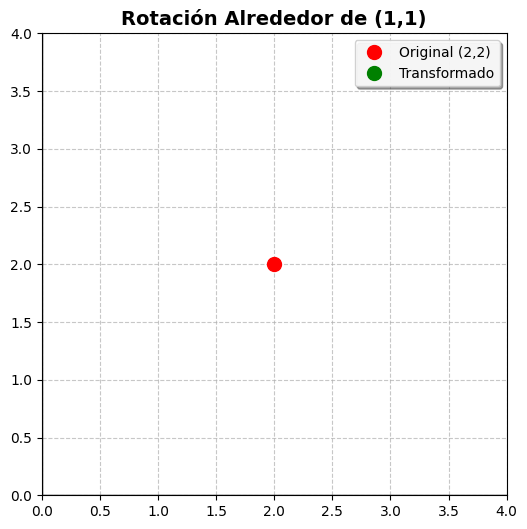

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir matrices
theta = np.pi / 4  # Rotación de 45 grados
T = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 1]])  # Matriz de traslación para mover el origen a (1,1)
R = np.array([[np.cos(theta), -np.sin(theta), 0],  # Matriz de rotación de 45 grados
              [np.sin(theta), np.cos(theta), 0],
              [0, 0, 1]])
T_inv = np.array([[1, 0, -1], [0, 1, -1], [0, 0, 1]])  # Matriz para revertir la traslación

# Componer la transformación combinando traslación, rotación y traslación inversa
M = T_inv @ R @ T

# Aplicar transformación a un punto
p = np.array([2, 2, 1])  # Punto en coordenadas homogéneas
p_transformed = M @ p

# Función para graficar puntos
def plot_point(p, label, color='blue'):
    plt.plot(p[0], p[1], 'o', markersize=10, color=color, label=label)  # Aumento del tamaño del marcador

# Crear gráfico
plt.figure(figsize=(6, 6))
plot_point(p[:2], 'Original (2,2)', 'red')
plot_point(p_transformed[:2], 'Transformado', 'green')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)
plt.title('Rotación Alrededor de (1,1)', fontsize=14, fontweight='bold')
plt.show()

**Conclusión**

Realizar transformaciones en una base modificada es una técnica poderosa en matemáticas y ciencias aplicadas. Permite simplificar problemas al trabajar en un sistema de coordenadas más adecuado para la tarea en cuestión. Esta metodología es esencial en gráficos por computadora para manipular imágenes, en mecánica para estudiar movimientos relativos y en física para analizar sistemas en marcos de referencia no estándar.

### **4.1.4 Matrices ortogonales**

Las matrices ortogonales son un tipo fundamental de matriz en álgebra lineal, con propiedades únicas y aplicaciones en diversas áreas como la computación gráfica, la física cuántica y las matemáticas puras. Una matriz ortogonal es una matriz cuadrada cuyas filas y columnas son vectores ortogonales unitarios (ortonormales), lo que significa que son perpendiculares entre sí y tienen longitud uno.

**Definición de Matrices Ortogonales**

Una matriz $(A)$ es ortogonal si cumple con la siguiente condición:

$A^T A = AA^T = I$

donde $(A^T)$ es la transpuesta de $(A)$, e $(I)$ es la matriz identidad. Esta relación implica que $(A^T = A^{-1})$, es decir, la transpuesta de una matriz ortogonal es también su inversa.

**Propiedades de las Matrices Ortogonales**

**Preservación de la longitud:** Las matrices ortogonales preservan la longitud de los vectores, es decir, si $(\mathbf{x})$ es un vector, entonces $|A\mathbf{x}| = |\mathbf{x}|$.

**Preservación del producto escalar:** El producto escalar entre dos vectores se conserva bajo transformaciones ortogonales. Si $(\mathbf{x})$ y $(\mathbf{y})$ son dos vectores, entonces:

   $\langle A\mathbf{x}, A\mathbf{y} \rangle = \langle \mathbf{x}, \mathbf{y} \rangle$

**Preservación del ángulo:** Debido a que se preserva el producto escalar, los ángulos entre los vectores también se conservan.

**Ejemplo: Matriz de Rotación en 2D**

Una de las matrices ortogonales más comunes es la matriz de rotación en el plano 2D. Esta matriz rota un vector por un ángulo $(\theta)$ alrededor del origen:

$R(\theta) = \begin{pmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{pmatrix}$

**Cálculo de la Transpuesta y la Inversa**

La transpuesta de la matriz de rotación es:

$R(\theta)^T = \begin{pmatrix}
\cos(\theta) & \sin(\theta) \\
-\sin(\theta) & \cos(\theta)
\end{pmatrix}$

Multiplicando $(R(\theta))$ por su transpuesta, obtenemos la matriz identidad:

$R(\theta)R(\theta)^T = \begin{pmatrix}
\cos^2(\theta) + \sin^2(\theta) & \cos(\theta)(-\sin(\theta)) + \sin(\theta)\cos(\theta) \\
\sin(\theta)\cos(\theta) - \sin(\theta)\cos(\theta) & \sin^2(\theta) + \cos^2(\theta)
\end{pmatrix} = I$

**Código en Python para la Rotación y Verificación de Ortogonalidad**

R * R^T:
 [[1. 0.]
 [0. 1.]]


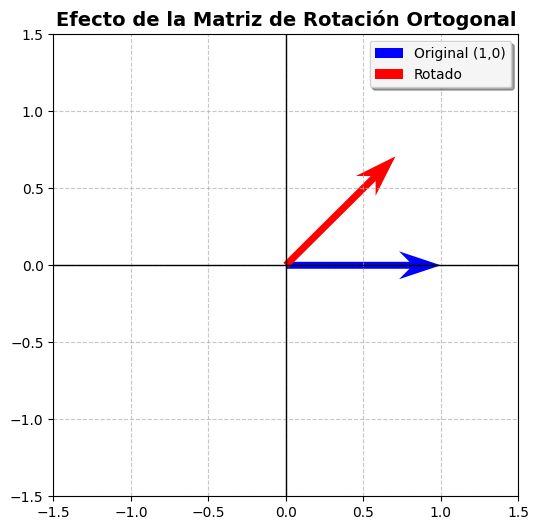

In [6]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.pi / 4  # 45 grados

# Matriz de rotación
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Verificación de ortogonalidad
print("R * R^T:\n", np.dot(R, R.T))

# Función para graficar vectores
def plot_vector(vec, origin=[0, 0], color='r', label=None):
    # Aumentando el tamaño visual de los vectores para mejor visualización
    plt.quiver(*origin, *vec, color=color, scale=1, scale_units='xy', angles='xy', label=label, width=0.015, headwidth=4, headlength=6)

# Vector original y rotado
v = np.array([1, 0])
v_rotated = R.dot(v)

# Crear gráfico
plt.figure(figsize=(6, 6))  # Ajustando el tamaño para mejor visualización
plot_vector(v, color='blue', label='Original (1,0)')
plot_vector(v_rotated, color='red', label='Rotado')

# Configuración adicional para mejorar la visualización
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True, linestyle='--', alpha=0.7)  # Grilla más visible
plt.axhline(0, color='black', linewidth=1)  # Líneas de los ejes más visibles
plt.axvline(0, color='black', linewidth=1)
plt.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)
plt.title('Efecto de la Matriz de Rotación Ortogonal', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

**Conclusión**

Las matrices ortogonales son cruciales en muchos campos de la ciencia y la tecnología debido

 a su capacidad para realizar transformaciones preservando la longitud y los ángulos, lo que es fundamental en contextos como la mecánica, la robótica, y la teoría de señales. Entender y utilizar estas matrices facilita el diseño de sistemas eficientes y robustos en aplicaciones que van desde el procesamiento digital de imágenes hasta la simulación física.

### **4.1.5 El proceso Gram-Schmidt**

El proceso de Gram-Schmidt es una técnica fundamental en álgebra lineal para obtener un conjunto de vectores ortonormales a partir de un conjunto inicial de vectores linealmente independientes. Este proceso es crucial en muchas aplicaciones matemáticas y de ingeniería, como la descomposición QR, métodos numéricos, y en el análisis de sistemas ortogonales en física y estadística.

**Concepto del Proceso de Gram-Schmidt**

El objetivo del proceso de Gram-Schmidt es, dado un conjunto de vectores linealmente independientes, generar un conjunto ortogonal o ortonormal de vectores que abarque el mismo espacio vectorial. Este método transforma vectores de manera iterativa, asegurando que cada nuevo vector sea ortogonal a todos los anteriores.

**Fórmula y Algoritmo del Proceso de Gram-Schmidt**

El proceso se puede dividir en dos fases: ortogonalización y normalización.

**Ortogonalización**

Se toma un conjunto de vectores ${\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_n}$ y se transforma en un conjunto ortogonal ${\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_n}$ usando las siguientes fórmulas iterativas:

$\mathbf{u}_1 = \mathbf{v}_1$

$\mathbf{u}_k = \mathbf{v}_k - \sum_{j=1}^{k-1} \text{proj}_{\mathbf{u}_j} (\mathbf{v}_k)$

donde $(\text{proj}_{\mathbf{u}_j} (\mathbf{v}_k))$ es la proyección del vector $(\mathbf{v}_k)$ sobre $(\mathbf{u}_j)$ y se calcula como:

$\text{proj}_{\mathbf{u}_j} (\mathbf{v}_k) = \frac{\mathbf{v}_k \cdot \mathbf{u}_j}{\mathbf{u}_j \cdot \mathbf{u}_j} \mathbf{u}_j$

**Normalización**

Una vez que tenemos el conjunto ortogonal, podemos normalizar cada vector para obtener un conjunto ortonormal:

$\mathbf{e}_k = \frac{\mathbf{u}_k}{\|\mathbf{u}_k\|}$

**Ejemplo Práctico: Gram-Schmidt en $(\mathbb{R}^3)$**

Consideremos los vectores $\mathbf{v}_1 = (1, 1, 0)$, $\mathbf{v}_2 = (1, 0, 1)$, y $\mathbf{v}_3 = (0, 1, 1)$ en $(\mathbb{R}^3)$.

**Código en Python para el Proceso de Gram-Schmidt**

In [7]:
import numpy as np

# Definir vectores iniciales
v1 = np.array([1, 1, 0], dtype=float)
v2 = np.array([1, 0, 1], dtype=float)
v3 = np.array([0, 1, 1], dtype=float)

# Función para calcular la proyección
def proj(u, v):
    return (np.dot(v, u) / np.dot(u, u)) * u

# Ortogonalización
u1 = v1
u2 = v2 - proj(u1, v2)
u3 = v3 - proj(u1, v3) - proj(u2, v3)

# Normalización
e1 = u1 / np.linalg.norm(u1)
e2 = u2 / np.linalg.norm(u2)
e3 = u3 / np.linalg.norm(u3)

print("Bases ortonormales:")
print("e1:", e1)
print("e2:", e2)
print("e3:", e3)

Bases ortonormales:
e1: [0.70710678 0.70710678 0.        ]
e2: [ 0.40824829 -0.40824829  0.81649658]
e3: [-0.57735027  0.57735027  0.57735027]


**Visualización de Vectores**

Para visualizar los vectores antes y después del proceso de Gram-Schmidt, podemos usar matplotlib.

**Código para Visualización en Python**

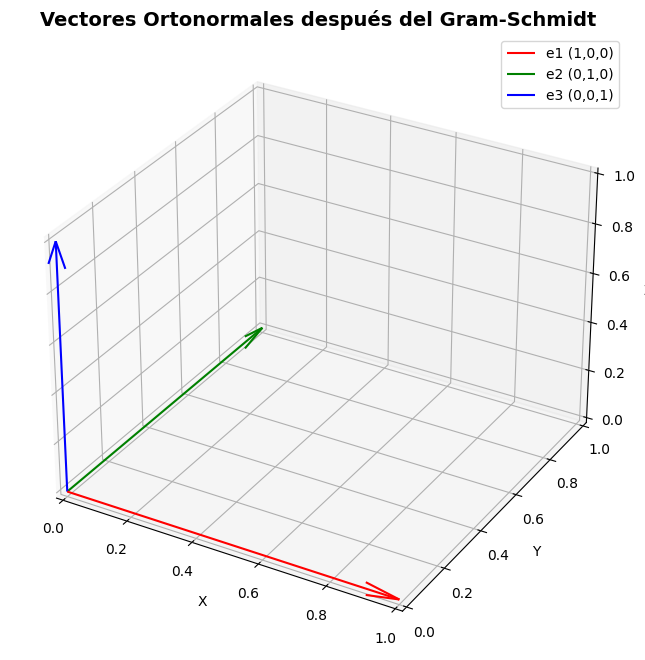

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir vectores ortonormales como ejemplo (sustituir por tu propio resultado de Gram-Schmidt)
e1 = np.array([1, 0, 0])
e2 = np.array([0, 1, 0])
e3 = np.array([0, 0, 1])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Función para graficar vectores
def plot_vector(v, origin=[0, 0, 0], color='r', label=None):
    ax.quiver(*origin, *v, color=color, length=1, normalize=True, label=label, arrow_length_ratio=0.1)

# Graficar vectores
plot_vector(e1, color='red', label='e1 (1,0,0)')
plot_vector(e2, color='green', label='e2 (0,1,0)')
plot_vector(e3, color='blue', label='e3 (0,0,1)')

# Configuración del gráfico
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Vectores Ortonormales después del Gram-Schmidt', fontsize=14, fontweight='bold')
ax.legend()

# Mostrar el gráfico
plt.show()

**Conclusión**

El proceso de Gram-Schmidt es esencial para crear bases ortogonales y ortonormales, que son cruciales en muchos contextos matemáticos y de ingeniería, como en la solución de ecuaciones diferenciales, en la simplificación de problemas en mecánica cuántica y en el procesamiento de señales y datos. Dominar este proceso y comprender cómo se aplica puede abrir puertas a técnicas avanzadas en ciencia y tecnología.

### **4.1.6 Ejemplo: Reflejarse en un plano**

Reflejar un objeto en un plano es un concepto geométrico que se utiliza frecuentemente en gráficos por computadora, diseño asistido por computadora (CAD) y en la teoría de la física. Este tipo de transformación es un ejemplo de cómo las matrices pueden ser utilizadas para manipular coordenadas y transformar figuras en el espacio.

**Concepto de Reflejo en un Plano**

La reflexión en un plano implica "voltear" un objeto sobre ese plano, de modo que el plano actúa como un espejo. Matemáticamente, esta transformación puede describirse usando una matriz de reflexión, que cambia la orientación de los puntos en relación con dicho plano.

**Ejemplo: Reflejo en el Plano XY**

Vamos a considerar el caso más simple de reflejar un punto en el plano XY. Esto significa que invertiremos la coordenada $(z)$ de cualquier punto, dejando las coordenadas $(x)$ e $(y)$ sin cambios. La matriz que realiza esta reflexión es:

$R = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & -1
\end{pmatrix}$

Esta matriz conserva las componentes $(x)$ e $(y)$ de un vector y multiplica por -1 la componente $(z)$, reflejando el punto a través del plano XY.

**Ejemplo Práctico: Reflejar un Punto**

Supongamos que queremos reflejar el punto $(2, 3, 4)$ a través del plano XY. Utilizando la matriz de reflexión $(R)$, el nuevo punto $(x', y', z')$ se calcula como:

$\begin{pmatrix}
x' \\
y' \\
z'
\end{pmatrix}
= R \cdot \begin{pmatrix}
2 \\
3 \\
4
\end{pmatrix}
= \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & -1
\end{pmatrix}
\cdot
\begin{pmatrix}
2 \\
3 \\
4
\end{pmatrix}
= \begin{pmatrix}
2 \\
3 \\
-4
\end{pmatrix}$

**Código en Python para Reflejar un Punto**

In [9]:
import numpy as np

# Definir la matriz de reflexión
R = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, -1]
])

# Definir el punto original
punto_original = np.array([2, 3, 4])

# Aplicar la reflexión
punto_reflejado = np.dot(R, punto_original)

print("Punto original:", punto_original)
print("Punto reflejado:", punto_reflejado)

Punto original: [2 3 4]
Punto reflejado: [ 2  3 -4]


**Visualización de la Reflexión**

Vamos a visualizar el punto original y su reflejado respecto al plano XY usando Matplotlib.

**Código para Visualización en Python**

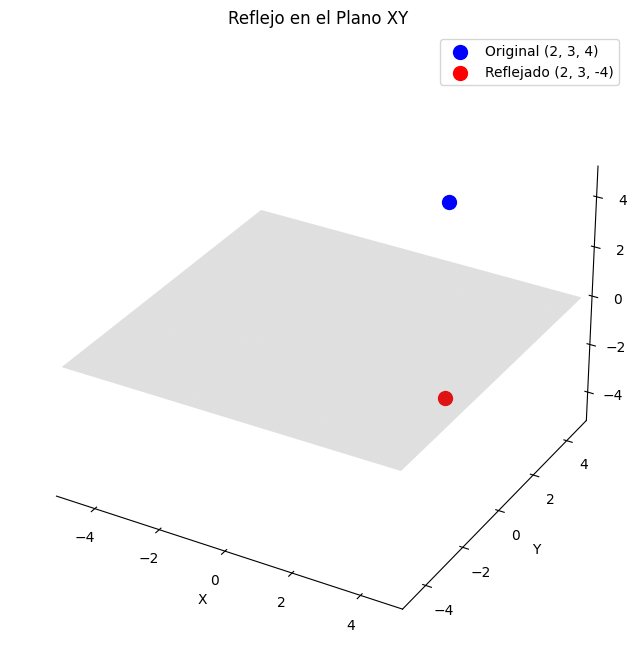

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configurar gráfico 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar el plano XY
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
zz = xx*0
ax.plot_surface(xx, yy, zz, alpha=0.2, color='grey')  # Reducing opacity for better visibility of other elements

# Definir puntos original y reflejado
punto_original = [2, 3, 4]
punto_reflejado = [2, 3, -4]

# Añadir puntos original y reflejado
ax.scatter(*punto_original, color='blue', s=100, label='Original (2, 3, 4)')
ax.scatter(*punto_reflejado, color='red', s=100, label='Reflejado (2, 3, -4)')

# Ajustes modernos para propiedades de los ejes
ax.xaxis.pane.fill = False  # Remove pane fill for x-axis for a cleaner look
ax.yaxis.pane.fill = False  # Remove pane fill for y-axis
ax.zaxis.pane.fill = False  # Remove pane fill for z-axis

ax.xaxis.pane.set_edgecolor('white')  # Set edge color to white for a cleaner separation
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')

ax.grid(False)  # Disable grid to reduce visual clutter

# Configurar límites y etiquetas
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Añadir leyenda y título
ax.legend()
ax.set_title('Reflejo en el Plano XY')

plt.show()

**Conclusión**

Reflejar objetos en un plano es un ejemplo claro de cómo las matrices pueden ser utilizadas para realizar transformaciones geométricas simples pero poderosas. Este tipo de operaciones es crucial en el diseño asistido por computadora y en la simulación, donde la manipulación precisa de objetos es necesaria para crear diseños y análisis efectivos.

### **4.1.7 Multiplicación de matrices no cuadradas**

La multiplicación de matrices no cuadradas es una operación fundamental en álgebra lineal que tiene una amplia gama de aplicaciones prácticas, desde la resolución de sistemas de ecuaciones lineales hasta la transformación de datos en estadísticas y ciencia de datos. A diferencia de la multiplicación de matrices cuadradas, donde las matrices involucradas son del mismo tamaño, la multiplicación de matrices no cuadradas implica matrices de diferentes dimensiones.

**Concepto de Multiplicación de Matrices No Cuadradas**

La multiplicación de matrices se define bajo la regla de que el número de columnas de la primera matriz debe ser igual al número de filas de la segunda matriz. Si $(A)$ es una matriz de tamaño $(m \times n)$ y $(B)$ es una matriz de tamaño $(n \times p)$, entonces el producto $(AB)$ es una matriz de tamaño $(m \times p)$.

**Fórmula de la Multiplicación de Matrices**

El elemento en la fila $(i)$ y columna $(j)$ del producto $(AB)$, denotado $(c_{ij})$, se calcula como:

$c_{ij} = \sum_{k=1}^n a_{ik} b_{kj}$

donde $(a_{ik})$ es el elemento en la fila $(i)$ y columna $(k)$ de $(A)$, y $(b_{kj})$ es el elemento en la fila $(k)$ y columna $(j)$ de $(B)$.

**Ejemplo Práctico: Multiplicación de Matrices No Cuadradas**

Supongamos que queremos multiplicar las siguientes matrices $(A)$ y $(B)$:

$A = \begin{pmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{pmatrix}, \quad B = \begin{pmatrix}
7 & 8 \\
9 & 10
\end{pmatrix}$

$(A)$ es una matriz $(3 \times 2)$ y $(B)$ es una matriz $(2 \times 2)$. El producto $(AB)$ será una matriz $(3 \times 2)$.

**Cálculo de $(AB)$**

$AB = \begin{pmatrix}
1 \times 7 + 2 \times 9 & 1 \times 8 + 2 \times 10 \\
3 \times 7 + 4 \times 9 & 3 \times 8 + 4 \times 10 \\
5 \times 7 + 6 \times 9 & 5 \times 8 + 6 \times 10
\end{pmatrix} = \begin{pmatrix}
25 & 28 \\
55 & 62 \\
85 & 96
\end{pmatrix}$

**Código en Python para Multiplicación de Matrices No Cuadradas**

In [11]:
import numpy as np

# Definir las matrices A y B
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7, 8], [9, 10]])

# Multiplicar A por B
C = np.dot(A, B)

print("Producto de A y B:\n", C)

Producto de A y B:
 [[ 25  28]
 [ 57  64]
 [ 89 100]]


**Visualización de la Multiplicación de Matrices**

Dado que la visualización directa de la multiplicación de matrices no es tan intuitiva como otras operaciones geométricas, una forma de ilustrar esto es mostrar el cálculo de cada elemento como una suma de productos de elementos correspondientes de filas y columnas.

**Código para Visualización Conceptual en Python**

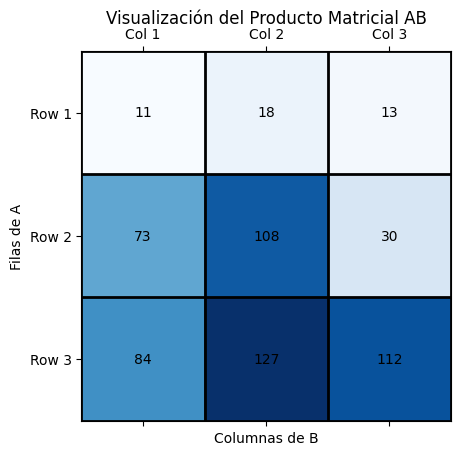

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que A y B son dos matrices que queremos multiplicar
A = np.random.randint(0, 10, (3, 3))
B = np.random.randint(0, 10, (3, 3))
C = np.dot(A, B)  # Producto de matrices A y B

# Generar una matriz de coordenadas para resaltar filas y columnas en la multiplicación
fig, ax = plt.subplots()
cmap = plt.get_cmap('Blues')
ax.matshow(C, cmap=cmap)

# Añadir texto en cada celda de la matriz
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        c = C[i, j]
        ax.text(j, i, str(c), va='center', ha='center', color='black' if c > C.max()/2 else 'black')

# Configuración de visualización
plt.title('Visualización del Producto Matricial AB', pad=20)

# Set custom tick labels correctly using FixedLocator
ax.set_xticks(np.arange(C.shape[1]))
ax.set_yticks(np.arange(C.shape[0]))
ax.set_xticklabels(['Col {}'.format(col+1) for col in range(C.shape[1])])
ax.set_yticklabels(['Row {}'.format(row+1) for row in range(C.shape[0])])

# Configuración de etiquetas para ejes
ax.set_xlabel('Columnas de B')
ax.set_ylabel('Filas de A')

# Mejorar aspecto de la grilla y los bordes
ax.grid(False)  # Ocultar la grilla por defecto
ax.set_xticks(np.arange(-.5, C.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, C.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
ax.tick_params(which='minor', size=0)  # Eliminar ticks para reducir la confusión visual

plt.show()

**Conclusión**

La multiplicación de matrices no cuadradas es una herramienta esencial en muchas disciplinas científicas y técnicas. Esta operación no solo permite la transformación y manipulación de datos en grandes dimensiones, sino que también es fundamental en la teoría de redes, optimización, y algoritmos de aprendizaje automático. Comprender cómo realizar y visualizar estas multiplicaciones es crucial para aplicar efectivamente técnicas matemáticas avanzadas en problemas prácticos.

### **4.1.8 Ejemplo: Utilizar matrices no cuadradas para hacer una proyección**

Utilizar matrices no cuadradas para realizar proyecciones es un método potente en matemáticas aplicadas, especialmente útil en el análisis de datos, gráficos por computadora y en la optimización de sistemas. En este contexto, una proyección es una transformación lineal que mapea un vector a un subespacio, usualmente de menor dimensión, a través del uso de una matriz de proyección.

**Concepto de Proyección con Matrices No Cuadradas**

Una proyección transforma cualquier vector en un espacio vectorial a un vector en un subespacio que, por lo general, representa características o dimensiones deseables. Por ejemplo, en procesamiento de señales y reducción de dimensionalidad, tales transformaciones son cruciales para eliminar componentes no deseados de los datos o para simplificar modelos.

**Fórmula General de la Matriz de Proyección**

Supongamos que tenemos un conjunto de vectores que forman una base para el subespacio al que deseamos proyectar. La matriz de proyección $(P)$ que mapea vectores al subespacio generado por estos vectores se calcula usando:

$P = A(A^T A)^{-1}A^T$

Donde:

- $(A)$ es la matriz cuyas columnas son los vectores base del subespacio.

- $(A^T)$ es la transpuesta de $(A)$.

- $(A^T A)^{-1}$ es la inversa del producto de $(A^T)$ y $(A)$.

**Ejemplo Práctico: Proyección en $(\mathbb{R}^2)$**

Imaginemos que queremos proyectar vectores en $(\mathbb{R}^3)$ sobre el plano $(xy)$, ignorando la componente $(z)$. Para esto, podemos utilizar una matriz de proyección construida específicamente para este propósito.

**Matriz de Proyección**

Para proyectar sobre el plano $(xy)$, los vectores de la base son simplemente $\mathbf{i} = (1, 0, 0)$ y $\mathbf{j} = (0, 1, 0)$. La matriz $(A)$ es entonces:

$A = \begin{pmatrix}
1 & 0 \\
0 & 1 \\
0 & 0
\end{pmatrix}$

La matriz de proyección $(P)$ se calcula como:

$P = A(A^T A)^{-1}A^T = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{pmatrix}$

Esta matriz deja las primeras dos coordenadas de cualquier vector en $(\mathbb{R}^3)$ inalteradas y elimina la tercera, efectivamente proyectándolo sobre el plano $(xy)$.

**Código en Python para la Proyección**

In [13]:
import numpy as np

# Definir la matriz A
A = np.array([[1, 0], [0, 1], [0, 0]])

# Calcular A^T
A_T = A.T

# Calcular (A^T A)^-1 A^T
A_pseudo_inverse = np.linalg.inv(A_T @ A) @ A_T

# Calcular la matriz de proyección P
P = A @ A_pseudo_inverse

# Definir un vector en R^3
v = np.array([3, 2, 5])

# Aplicar la matriz de proyección
v_projected = P @ v

print("Vector original:", v)
print("Vector proyectado:", v_projected)

Vector original: [3 2 5]
Vector proyectado: [3. 2. 0.]


**Visualización de la Proyección**

Para visualizar el efecto de la matriz de proyección, podemos graficar el vector original y su proyección en un espacio tridimensional.

**Código para Visualización en Python**

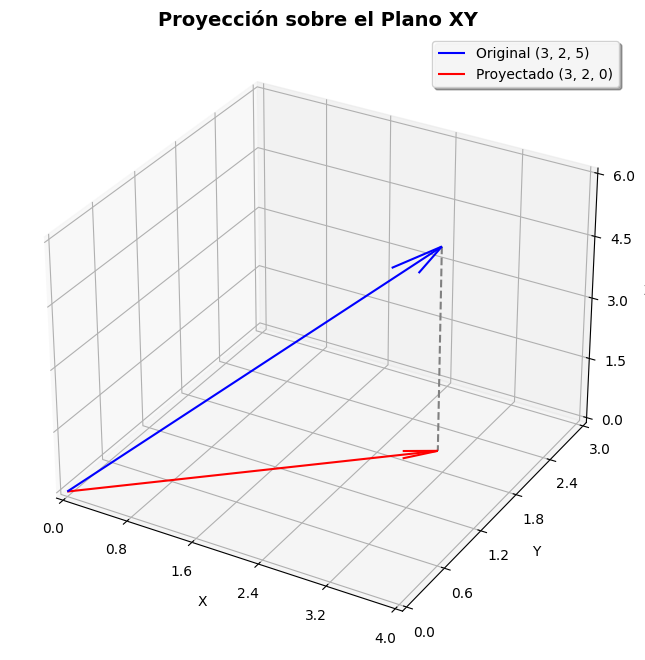

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))  # Ajustar el tamaño para una mejor visualización
ax = fig.add_subplot(111, projection='3d')

# Definir el vector original y su proyección
v = np.array([3, 2, 5])
v_projected = np.array([3, 2, 0])

# Dibujar el vector original
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', label='Original (3, 2, 5)', arrow_length_ratio=0.1)

# Dibujar el vector proyectado
ax.quiver(0, 0, 0, v_projected[0], v_projected[1], v_projected[2], color='red', label='Proyectado (3, 2, 0)', arrow_length_ratio=0.1)

# Dibujar línea entre el extremo del vector original y su proyección
ax.plot([v[0], v_projected[0]], [v[1], v_projected[1]], [v[2], v_projected[2]], 'gray', linestyle='--')

# Configuración del gráfico
ax.set_xlim([0, 4])
ax.set_ylim([0, 3])
ax.set_zlim([0, 6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mejorar la visualización de las etiquetas y límites
ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Limitar el número de ticks para mayor claridad
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))

ax.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)
plt.title('Proyección sobre el Plano XY', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

**Conclusión**

La utilización de matrices no cuadradas para realizar proyecciones permite transformar espacios de manera que se conserven solo las dimensiones o características deseadas, eliminando las redundantes o innecesarias. Este proceso es esencial en muchos campos técnicos y científicos, incluyendo la visión por computadora, análisis de datos, y más. Comprender y aplicar correctamente estas técnicas puede proporcionar herramientas poderosas para el análisis y la simplificación de datos complejos.

### **4.1.9 Proceso Gram-Schmidt**

El proceso de Gram-Schmidt es un método fundamental en álgebra lineal para ortogonalizar un conjunto de vectores, es decir, transformar un conjunto de vectores en otro conjunto donde todos los vectores son ortogonales (perpendiculares) entre sí. Este proceso también se puede extender para ortonormalizar un conjunto, donde todos los vectores son ortogonales y de longitud unitaria.

**Concepto del Proceso de Gram-Schmidt**

El objetivo del proceso de Gram-Schmidt es convertir un conjunto de vectores linealmente independientes en un conjunto ortogonal o ortonormal. Esto es particularmente útil en muchas aplicaciones matemáticas, como la descomposición QR en análisis numérico, la construcción de bases ortogonales en espacios de funciones, y en la simplificación de cálculos en geometría y física.

**Cómo Funciona el Proceso de Gram-Schmidt**

Supongamos que tenemos un conjunto de $(n)$ vectores linealmente independientes ${\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_n}$ en $(\mathbb{R}^n)$. El proceso de Gram-Schmidt transforma este conjunto en otro conjunto ${\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_n}$ de vectores ortogonales.

**Algoritmo del Proceso de Gram-Schmidt**

**Inicialización:**

   $\mathbf{u}_1 = \mathbf{v}_1$

**Para cada $(i)$ de 2 a $(n)$:**

   - Calcula $(\mathbf{u}_i)$ como:

     $\mathbf{u}_i = \mathbf{v}_i - \sum_{j=1}^{i-1} \text{proj}_{\mathbf{u}_j}(\mathbf{v}_i)$

   - Donde $(\text{proj}_{\mathbf{u}_j}(\mathbf{v}_i))$ es la proyección del vector $(\mathbf{v}_i)$ sobre el vector $(\mathbf{u}_j)$:

     $\text{proj}_{\mathbf{u}_j}(\mathbf{v}_i) = \frac{\mathbf{v}_i \cdot \mathbf{u}_j}{\mathbf{u}_j \cdot \mathbf{u}_j} \mathbf{u}_j$

**Ortonormalización (opcional):**

   - Para convertir cada $(\mathbf{u}_i)$ en un vector unitario $(\mathbf{e}_i)$:

     $\mathbf{e}_i = \frac{\mathbf{u}_i}{\|\mathbf{u}_i\|}$


**Ejemplo con Vectores en $(\mathbb{R}^3)$**

Supongamos que tenemos tres vectores en $(\mathbb{R}^3)$:

$\mathbf{v}_1 = \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}, \quad \mathbf{v}_2 = \begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix}, \quad \mathbf{v}_3 = \begin{pmatrix} 0 \\ 1 \\ 1 \end{pmatrix}$

**Código en Python para el Proceso de Gram-Schmidt**

In [15]:
import numpy as np

# Definir los vectores y asegurarse de que sean de tipo float
v1 = np.array([1, 1, 0], dtype=float)
v2 = np.array([1, 0, 1], dtype=float)
v3 = np.array([0, 1, 1], dtype=float)

# Lista para almacenar los vectores u
u = []

# Primer vector u es igual a v1
u.append(v1)

# Proceso Gram-Schmidt
for v in [v2, v3]:
    u_i = v.copy()  # Crear una copia para evitar modificar v durante el proceso
    for j in range(len(u)):
        u_i -= np.dot(v, u[j]) / np.dot(u[j], u[j]) * u[j]
    u.append(u_i)

# Convertir a ortonormal
e = [vec / np.linalg.norm(vec) for vec in u]

# Mostrar los vectores ortonormales
print("Vectores ortonormales resultantes:")
for vec in e:
    print(vec)

Vectores ortonormales resultantes:
[0.70710678 0.70710678 0.        ]
[ 0.40824829 -0.40824829  0.81649658]
[-0.57735027  0.57735027  0.57735027]


**Visualización de Vectores**

Para visualizar los vectores originalmente y después de la ortogonalización/ortonormalización, podemos usar matplotlib en un gráfico 3D.

**Código para Visualización en Python**

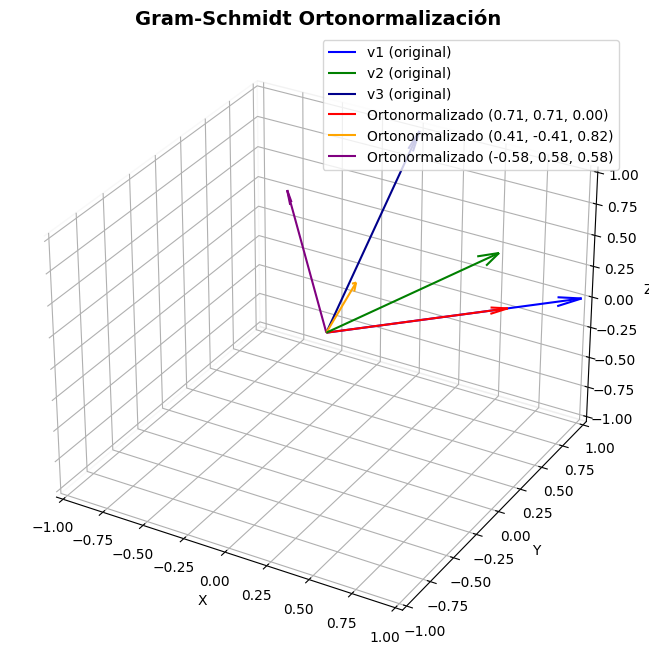

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir los vectores
v1 = np.array([1, 1, 0], dtype=float)
v2 = np.array([1, 0, 1], dtype=float)
v3 = np.array([0, 1, 1], dtype=float)

# Lista para almacenar los vectores u
u = []

# Primer vector u es igual a v1
u.append(v1)

# Proceso Gram-Schmidt
for v in [v2, v3]:
    u_i = v.copy()  # Crear una copia para evitar modificar v durante el proceso
    for j in range(len(u)):
        u_i -= np.dot(v, u[j]) / np.dot(u[j], u[j]) * u[j]
    u.append(u_i)

# Convertir a ortonormal
e = [vec / np.linalg.norm(vec) for vec in u]

# Configuración de la gráfica 3D
fig = plt.figure(figsize=(8, 8))  # Ajustar el tamaño para una mejor visualización
ax = fig.add_subplot(111, projection='3d')

# Función para agregar vectores al gráfico
def plot_vector(vec, origin=[0, 0, 0], color='r', label=None):
    # Ajustando propiedades de la flecha para mejor visualización
    ax.quiver(*origin, *vec, color=color, label=label, length=np.linalg.norm(vec), normalize=True, arrow_length_ratio=0.1)

# Agregar los vectores originales al gráfico
plot_vector(v1, color='blue', label='v1 (original)')
plot_vector(v2, color='green', label='v2 (original)')
plot_vector(v3, color='darkblue', label='v3 (original)')

# Agregar los vectores ortonormales al gráfico
colors = ['red', 'orange', 'purple']  # Diferentes colores para cada vector ortonormal
for vec, col in zip(e, colors):
    plot_vector(vec, color=col, label=f'Ortonormalizado ({vec[0]:.2f}, {vec[1]:.2f}, {vec[2]:.2f})')

# Configuración de los límites y etiquetas
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Ajustar la grilla y los fondos de los ejes
ax.grid(True, linestyle='--', alpha=0.5)  # Grid más sutil
ax.xaxis.pane.fill = False  # Quitar el fondo para mejorar la visibilidad
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.legend()
plt.title('Gram-Schmidt Ortonormalización', fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

**Conclusión**

El proceso de Gram-Schmidt es esencial para crear bases ortogonales y ortonormales, facilitando cálculos en proyecciones, descomposiciones matriciales y otros análisis en espacios multidimensionales. Este método no solo proporciona una herramienta matemática poderosa, sino que también ayuda a entender mejor la estructura subyacente de los espacios vectoriales y sus transformaciones.

### **4.1.10 Oso reflector**

El término "oso reflector" no es estándar en el contexto de matemáticas, física, o ingeniería, por lo que parece haber un error o una confusión en la consulta. Sin embargo, puedo ofrecerte una explicación sobre los **espejos reflectores**, que son dispositivos que reflejan la luz o cualquier otra forma de energía radiante. Estos son esenciales en muchas aplicaciones, desde telescopios hasta faros de automóviles y proyectos de arte.

**Concepto de Espejo Reflector**

Un **espejo reflector** es una superficie que refleja la luz y otras formas de radiación electromagnética. Se utiliza comúnmente para concentrar, dispersar o dirigir ondas como la luz visible, infrarrojos, o microondas. Los espejos pueden tener diferentes formas, siendo las más comunes las planas, parabólicas y esféricas, cada una con propiedades ópticas específicas.

**Espejos Planos**

- **Propiedades**: Reflejan la luz formando una imagen virtual del objeto que parece estar detrás del espejo a la misma distancia que el objeto está frente a él.

- **Fórmula**: La ley de reflexión $(\theta_{\text{incidente}} = \theta_{\text{reflejado}})$ se aplica, donde $(\theta)$ es el ángulo respecto a la normal (perpendicular) a la superficie del espejo.

**Espejos Parabólicos**

- **Propiedades**: Concentran la luz paralela entrante (como la luz solar) en un único punto conocido como el foco. Esto es especialmente útil en aplicaciones como telescopios y antenas parabólicas.

- **Fórmula**: Para un espejo parabólico cuya ecuación es $(y = \frac{1}{4f}x^2)$ (donde $(f)$ es el foco), todas las rayas paralelas al eje de simetría se reflejan hacia el foco.

**Espejos Esféricos**

- **Propiedades**: Similar a los parabólicos, pero debido a su forma esférica, sufren de aberración esférica, lo que puede distorsionar la imagen.

- **Fórmula**: La relación entre el radio de curvatura $(R)$, el foco $(f)$, y la distancia del objeto $(p)$ y la imagen $(q)$ se da por la fórmula del espejo

 $\frac{1}{f} = \frac{1}{p} + \frac{1}{q}$, con $f = \frac{R}{2}$.

**Ejemplo en Python: Simulación de Reflexión en un Espejo Plano**

Podemos simular la reflexión de un rayo de luz en un espejo plano usando Python para visualizar cómo se comporta la luz al impactar y reflejarse en el espejo.

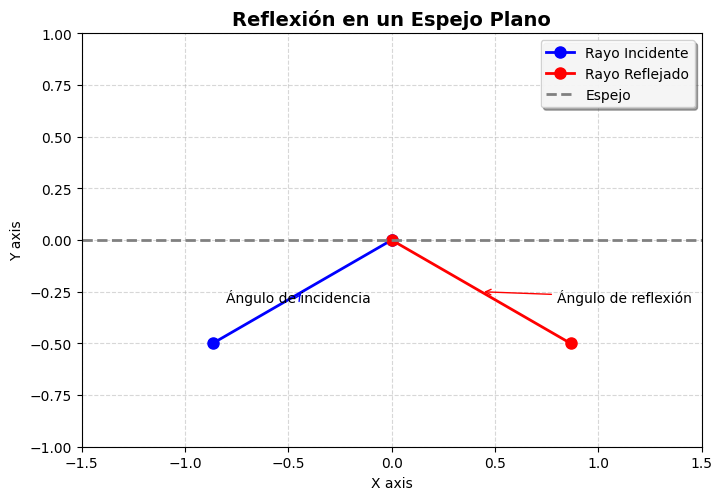

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el ángulo de incidencia
theta_inc = np.deg2rad(30)  # Convertir grados a radianes

# Coordenadas del rayo incidente (suponiendo que viene de arriba a la izquierda)
x_inc = np.array([0, -np.cos(theta_inc)])
y_inc = np.array([0, -np.sin(theta_inc)])

# Coordenadas del rayo reflejado (usando la ley de reflexión)
x_ref = np.array([0, np.cos(theta_inc)])
y_ref = np.array([0, -np.sin(theta_inc)])

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_inc, y_inc, 'b-', label='Rayo Incidente', linewidth=2, marker='o', markersize=8)
ax.plot(x_ref, y_ref, 'r-', label='Rayo Reflejado', linewidth=2, marker='o', markersize=8)

# Dibujar el espejo como una línea horizontal
ax.axhline(0, color='gray', linewidth=2, linestyle='--', label='Espejo')

# Configurar límites y otros parámetros del gráfico
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.grid(True, linestyle='--', alpha=0.5)  # Grilla sutil para mejor orientación

# Añadir detalles visuales
ax.legend(loc='upper right', frameon=True, framealpha=0.9, shadow=True)
plt.title('Reflexión en un Espejo Plano', fontsize=14, fontweight='bold')

# Anotaciones para clarificar el ángulo de incidencia y reflexión
ax.annotate('Ángulo de incidencia', xy=(-0.5*np.cos(theta_inc), -0.5*np.sin(theta_inc)),
             xytext=(-0.8, -0.3), arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='blue'))
ax.annotate('Ángulo de reflexión', xy=(0.5*np.cos(theta_inc), -0.5*np.sin(theta_inc)),
             xytext=(0.8, -0.3), arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='red'))

# Mostrar el gráfico
plt.show()

**Conclusión**

Espero que esta explicación sobre los espejos reflectores sea útil. Si el término "oso reflector" se refiere a un concepto específico de otro campo o es un término coloquial en tu área, por favor proporciona más detalles y estaré encantado de investigar más o ajustar la respuesta a tus necesidades.

| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./03_Matematica_aplicada_al_aprendizaje_automático_algebra_lineal.ipynb)| [⏩](./05_Matematica_aplicada_al_aprendizaje_automático_algebra_lineal.ipynb)|